In [ ]:
!pip install --user xgboost

In [ ]:
!pwd

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector
df_infer=pd.read_csv("data/GD_Part2_clean.csv")

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier, XGBRegressor

In [3]:
df_infer.head()

,Unnamed: 0,CPR_NO,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
0,0,70913390,المعهد الديني الجعفري,Cap,Science,M,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9
1,1,71105956,المعهد الديني الجعفري,Cap,Science,M,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5
2,2,70712190,المعهد الديني الجعفري,Cap,Science,M,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2
3,3,70207496,المعهد الديني الجعفري,Cap,Science,M,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9
4,4,70507953,المعهد الديني الجعفري,Cap,Science,M,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2


In [5]:
df_infer.set_index('CPR_NO', inplace=True)
# df_infer.index=df.CPR_NO
# df_infer.drop(["Unnamed: 0" ], axis=1, inplace=True)

In [6]:
df_infer.SCH_NM.nunique()

99

In [7]:
df_infer.drop(['TOTAL1','ACHIEVEMENTS2','MIDTERM2', 'FINAL2', 'TOTAL2', 'D_MARK', 'Unnamed: 0', "GPA"], axis=1, inplace=True)
# y=df_infer['NAT_class']

In [8]:
df_infer.keys()

Index(['SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender', 'ACHIEVEMENTS1',
       'MIDTERM1', 'FINAL1', 'NAT_MARK'],
      dtype='object')

In [9]:
df_infer[df_infer.isna().any(axis=1)]

,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,MIDTERM1,FINAL1,NAT_MARK
CPR_NO,,,,,,,,
70711321,مدرسة أحمد الفاتح الابتدائية الاعدادية للبنين,South,Science,M,NaN,NaN,NaN,45.2
60820420,مدرسة الرفاع الشرقي الابتدائية للبنات,South,Science,F,NaN,NaN,NaN,41.1
70613516,مدرسة الرفاع الشرقي الابتدائية للبنات,South,Science,F,NaN,NaN,NaN,37.7
60820438,مدرسة الرفاع الشرقي الابتدائية للبنات,South,Science,F,NaN,NaN,NaN,59.8
70800898,مدرسة الفارابي الإعدادية للبنين,North,Science,M,NaN,NaN,82.0,36.5
70116075,مدرسة المستقبل الابتدائية للبنات,South,Science,F,NaN,NaN,NaN,44.2
71001093,مدرسة رقية الابتدائية للبنات,Muharaq,Science,F,NaN,NaN,NaN,63.4
70922870,مدرسة سمية الابتدائية للبنات,Cap,Science,F,NaN,NaN,NaN,46.1
70405786,مدرسة عراد الابتدائية الإعدادية للبنين,Muharaq,Science,M,NaN,NaN,NaN,0.0


In [29]:
df_infer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24172 entries, 70913390 to 70211361
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NAT_MARK        24172 non-null  int64  
 1   SCH_NM          24172 non-null  int64  
 2   PROV_NM         24172 non-null  int64  
 3   SUBM            24172 non-null  int64  
 4   Teacher_Gender  24172 non-null  int64  
 5   ACHIEVEMENTS1   24172 non-null  float64
 6   MIDTERM1        24172 non-null  float64
 7   FINAL1          24172 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 1.7 MB


In [10]:
df_infer.dropna(inplace=True)

In [11]:

label_encoder = LabelEncoder()

for i in ['SCH_NM', "PROV_NM"]:

    df_infer[i] = label_encoder.fit_transform(df_infer[i])

In [12]:
df_infer.Teacher_Gender=((df_infer.Teacher_Gender=="M")+0)
df_infer.SUBM=((df_infer.SUBM=="Math")+0)

In [13]:
df_infer=df_infer[[ 'NAT_MARK','SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender', 'ACHIEVEMENTS1',
       'MIDTERM1', 'FINAL1']]

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.decomposition import PCA
from  scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [15]:

df_infer['NAT_MARK'] = ((df_infer['NAT_MARK']>=60)+0)

In [16]:
df_infer["NAT_MARK"].value_counts()

0    19299
1     4873
Name: NAT_MARK, dtype: int64

In [36]:
df_infer.to_csv("data/aws_inference_std_LogisticRegression_30_4.csv" )

In [37]:
! aws  s3  cp "data/aws_inference_std_LogisticRegression_30_4.csv"  s3://sec-students2016/sam1610

upload: data/aws_inference_std_LogisticRegression_30_4.csv to s3://sec-students2016/sam1610


In [ ]:
! aws s3 ls 

In [17]:
df_infer.head()

,NAT_MARK,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,MIDTERM1,FINAL1
CPR_NO,,,,,,,,
70913390,0,0,0,0,1,28.0,17.0,45.0
71105956,0,0,0,0,1,27.0,14.0,41.5
70712190,0,0,0,0,1,27.0,13.0,27.5
70207496,0,0,0,0,1,26.0,15.0,44.0
70507953,0,0,0,0,1,25.0,14.0,31.5


In [18]:
y=df_infer["NAT_MARK"]
X=df_infer.drop(['NAT_MARK'], axis=1)

In [19]:
df_infer.isna()

,NAT_MARK,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,MIDTERM1,FINAL1
CPR_NO,,,,,,,,
70913390,False,False,False,False,False,False,False,False
71105956,False,False,False,False,False,False,False,False
70712190,False,False,False,False,False,False,False,False
70207496,False,False,False,False,False,False,False,False
70507953,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
70304602,False,False,False,False,False,False,False,False
71007423,False,False,False,False,False,False,False,False
70402183,False,False,False,False,False,False,False,False


In [20]:
column_trans=make_column_transformer(
(StandardScaler(), ['ACHIEVEMENTS1', 'MIDTERM1' , 'FINAL1']),
(OneHotEncoder(), ['PROV_NM', 'SCH_NM']),
   #PCA(n_components=.95, svd_solver="full"),
 remainder="passthrough")



In [21]:
pipe=make_pipeline( column_trans, 
                   #SVC()
#XGBRegressor(  objective="reg:squarederror", num_round=150, nthread=-1)
                   XGBClassifier(objective= 'binary:logistic',seed=42, nthread=4,
)
                  )

In [22]:
from scipy import stats as st
# A parameter grid for XGBoost
parameters = {
#     'xgbclassifier__nthread':[4], #when use hyperthread, xgboost may become slower
              'xgbclassifier__objective': ['binary:logistic'],
              'xgbclassifier__learning_rate': np.arange(.01, .05, 0.05), #so called `eta` value
              'xgbclassifier__max_depth': np.arange(6, 8),
              'xgbclassifier__min_child_weight': np.arange(5,11),
              'xgbclassifier__silent':[1],
              'xgbclassifier__subsample':[0.8, .9,1],
              'xgbclassifier__colsample_bytree': [0.7, .8, .9, 1],
              'xgbclassifier__n_estimators':[150, 2050, 350 ] #number of trees, change it to 1000 for better results
#                'missing':[-999],
#               'seed': 42
             }

In [23]:

X_train,X_test,y_train, y_test=train_test_split(X,y , test_size=0.3, stratify=y,  random_state=42)
X_valid,X_test,y_valid, y_test=train_test_split(X_test,y_test , test_size=0.5,random_state=123)

In [24]:
skf = StratifiedKFold(n_splits=10 ,shuffle = True, random_state = 42)

clf = RandomizedSearchCV(pipe, parameters, n_jobs=-1, 
                   cv=skf.split(X_train,y_train)
                   ,scoring='roc_auc',
                   verbose=2, refit=True)

In [25]:
clf.fit(X_train,y_train) 

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  7.2min
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed: 27.8min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x119655c80>,
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('columntransformer',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='passthrough',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('standardscaler',
                                                                               StandardScaler(copy=True,
                                                                                              with_mean=True,
                                                                                              with_std=True),
        

In [30]:
from sklearn.metrics import confusion_matrix
cfm= pd.DataFrame(confusion_matrix(y_test, clf.predict(X_test)))
cfm.index.name="Actual"
cfm.columns.name="Predicted"

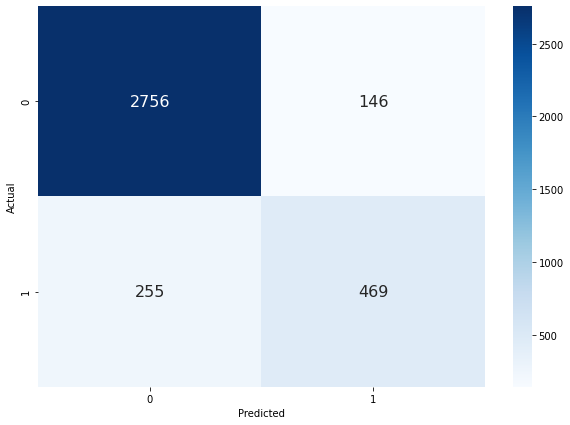

In [31]:
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib  inline
plt.figure(figsize=(10,7))
sns.heatmap(cfm , cmap="Blues", annot=True, annot_kws={"size":16}, fmt="g")

In [33]:
from sklearn.metrics import classification_report
target_names = ['<60', '>=60']
print(classification_report(y_test, clf.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

         <60       0.92      0.95      0.93      2902
        >=60       0.76      0.65      0.70       724

    accuracy                           0.89      3626
   macro avg       0.84      0.80      0.82      3626
weighted avg       0.88      0.89      0.89      3626



In [ ]:

skf = StratifiedKFold(n_splits=10 ,shuffle = True, random_state = 42)

GridSearch =GridSearchCV(pipe, params , n_jobs=-1,
                                  )

# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable

#timer(start_time) # timing ends here for "start_time" variable

In [ ]:
# GridSearch.fit(X_train, y_train)

In [49]:
print('\n All results:')
print(clf.cv_results_)
print('\n Best estimator:')
print(clf.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (3, 5))
print(clf.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(clf.best_params_)
results = pd.DataFrame(clf.cv_results_)
# results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([79.16778231,  7.04617591,  7.19036312, 90.73053577,  7.82609797,
       96.72684829, 19.74540157,  8.48513966, 19.60377131,  8.30671537]), 'std_fit_time': array([5.23744995, 0.68480953, 0.63601317, 2.35148707, 0.66097961,
       1.03787868, 0.30513827, 0.8149558 , 0.89567331, 0.67256333]), 'mean_score_time': array([1.16391711, 0.1039521 , 0.08900504, 1.12656324, 0.07717533,
       1.18735702, 0.14824891, 0.09103937, 0.18391683, 0.08585985]), 'std_score_time': array([0.12073387, 0.02791099, 0.02317704, 0.22076845, 0.01796171,
       0.30559345, 0.03370447, 0.02326228, 0.01063954, 0.03277194]), 'param_xgbclassifier__subsample': masked_array(data=[0.9, 0.9, 0.8, 1, 0.8, 0.9, 0.9, 0.9, 0.9, 0.8],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_xgbclassifier__silent': masked_array(data=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             mask=

In [50]:
y_train.head()

CPR_NO
71015264    1
70908036    0
70411484    1
80104223    0
70910332    1
Name: NAT_MARK, dtype: int64

# Learning curve

In [51]:
from sklearn.model_selection import learning_curve

train_size, train_score, test_score =learning_curve(estimator=pipe, 
                                                    X=X_train, 
                                                    y=y_train,
                                                    train_sizes=np.linspace(0.1, 1, 10 ), scoring='f1_weighted',
                                                    
                                                    cv=10 , n_jobs=1)

In [52]:
train_mean=np.mean(train_score, axis=1)
train_std= np.std (train_score, axis=1)
test_mean= np.mean(test_score,  axis=1)
test_std=  np.std (test_score,  axis=1)

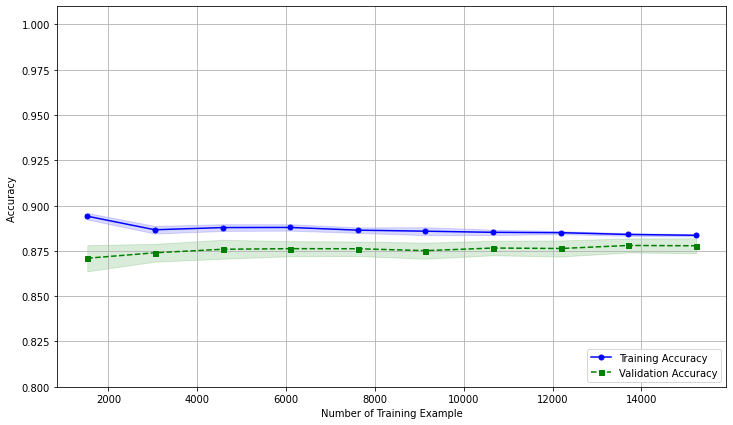

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plotGraph(train_size, train_mean, test_mean, 
          train_std, test_std,"linear", "Number of Training Example")

# validation curves

In [ ]:
np.arange(0, 1.2,0.2 )

In [57]:
from sklearn.model_selection import validation_curve
# from sklearn.model_selection import validation_curve
param_range =np.arange(0, 1.2, 0.2)
train_score, test_score =validation_curve(
    estimator=pipe, X=X_train, y=y_train, 
    param_name="xgbclassifier__reg_alpha", param_range=param_range, 
    cv=10,
    n_jobs=-1

)
train_mean=np.mean(train_score, axis=1)
train_std= np.std (train_score, axis=1)
test_mean= np.mean(test_score,  axis=1)
test_std=  np.std (test_score,  axis=1)

# plt.plot(param_range, train_mean, 
#         color="blue", 
#          marker="o",
#          markersize=5, 
#          label="Training Accuracy "
#         )


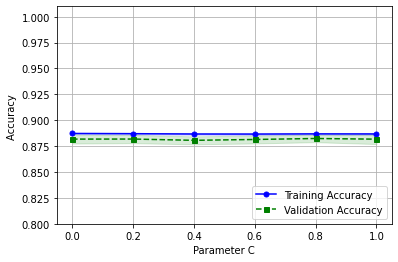

In [58]:
plotGraph(param_range, train_mean, test_mean, train_std, test_std, "linear", "Parameter C")

In [ ]:
random_search.best_params_

In [ ]:
clf=random_search.best_estimator_

In [ ]:
pipe=make_pipeline( column_trans, 
XGBClassifier(colsample_bytree=0.31033775002511965,
 learning_rate= 0.09572009075316446,
 max_depth= 5,
 min_child_weight= 2,
 n_estimators= 408))

In [ ]:
xg_classifier=XGBClassifier(colsample_bytree=0.5589969920043588,
 learning_rate= 0.5099169470416985,
 max_depth= 5,
 min_child_weight= 2,
 n_estimators= 180, scale_weight= 61)

In [ ]:
import xgboost as xgb
regressor=xgb.XGBRegressor(max_depth=5, eta=0.1, subsample=0.7, num_round=150, n_estimators=150)
regressor.fit(X_train,y_train, eval_set=[(X_train,y_train), (X_valid,y_valid)]) 

In [ ]:
eval_result=regressor.evals_result()

In [ ]:
t_round=range(len(eval_result["validation_0"]["rmse"]))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.scatter(t_round, eval_result["validation_0"]["rmse"], label=" Training Error")
plt.scatter(t_round, eval_result["validation_1"]["rmse"], label=" Validation Error")
plt.grid()
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.title("  Taining vs Validation Error")
plt.legend()
plt.show()



In [ ]:
import xgboost as xgb

In [ ]:
xgb.plot_importance(regressor)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
pd.crosstab(y_test, clf.predict(X_test))

In [ ]:
scores=cross_val_score( clf, X, y,cv=5,  scoring="recall_macro")

In [ ]:
print(f'CV Accuracy   {np.mean(scores):.3f} +/-  {np.std(scores)}')

In [ ]:
X_new=X.sample(5, random_state=42)
clf.fit(X, y )

In [ ]:
y_pred=clf.predict(X_test)
y_pred

In [ ]:
cl=["0-60","60-70" "70-80", "80-90","90-100"]
np.array([ cl[x] for x in y_pred])

In [ ]:
from sklearn.metrics import confusion_matrix
cfm= pd.DataFrame(confusion_matrix(y_test, y_pred))
cfm.index.name="Actual"
cfm.columns.name="Predicted"

In [ ]:
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib  inline
plt.figure(figsize=(10,7))
sns.heatmap(cfm , cmap="Blues", annot=True, annot_kws={"size":16}, fmt="g")

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
train_sizes, train_scores, test_scores= learning_curve(pipe, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), 
                                                      cv=10, n_jobs=-1)

In [ ]:
plt.plot(train_sizes, np.mean(train_scores, axis=1), color="blue", marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, np.mean(train_scores, axis=1) +np.std(train_scores, axis=1),np.mean(train_scores, axis=1)-  np.std(train_scores,axis=1), alpha=0.15, color="green")


plt.plot(train_sizes, np.mean(test_scores, axis=1), color="green", marker="s", linestyle="--", markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, np.mean(test_scores, axis=1) +np.std(test_scores, axis=1),np.mean(test_scores, axis=1)-  np.std(test_scores,axis=1), alpha=.15, color="green")

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel("Accuracy")
plt.legend(loc="best")
# plt.ylim([0.8, 1.03])
plt.show()

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
param_range=[0.001, 0.01, 0.1,0.2, 0.6, 0.8,  1]
train_scores, test_scores= validation_curve(pipe, X_train, y_train, param_name='xgbclassifier__learning_rate',
                                            param_range=param_range, cv=10)
                                                   

plt.plot(param_range, np.mean(train_scores, axis=1), color="blue", marker='o', markersize=5, label='Training accuracy')
plt.fill_between(param_range, np.mean(train_scores, axis=1) +np.std(train_scores, axis=1),np.mean(train_scores, axis=1)-  np.std(train_scores,axis=1), alpha=0.15, color="green")


plt.plot(param_range, np.mean(test_scores, axis=1), color="green", marker="s", linestyle="--", markersize=5, label='Validation accuracy')
plt.fill_between(param_range, np.mean(test_scores, axis=1) +np.std(test_scores, axis=1),np.mean(test_scores, axis=1)-  np.std(test_scores,axis=1), alpha=.15, color="green")

plt.grid()
plt.xscale('log')
plt.ylimit=([0.8, 1])
plt.show()

In [ ]:
x = np.linspace(0, 10, 20)
y=x**3

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(x,y, "--r", label="Cubed")
plt.plot(x, x**2, "D-k", label="squared")
plt.legend()

In [ ]:
x = ['Shirts', 'Pants','Shorts','Shoes']
y = [1000, 1200, 800, 1800]
plt.title('Sales Revenue by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Sales Revenue ($)')
plt.bar(x, y)

In [ ]:
y = np.random.normal(loc=0, scale=0.1, size=100)
plt.boxplot(y)
plt.show()

In [ ]:
from scipy.stats import shapiro
shap_w, shap_p = shapiro(y)
shap_w, shap_p

In [ ]:
from scipy.stats import zscore
y_z_scores = zscore(y)
y_z_scores

In [54]:
def plotGraph(x, y1, y2, y1std, y2std, scl, lbl):    
    plt.plot(x, 
             y1, 
                     color="blue", marker="o", markersize=5, label="Training Accuracy")
    plt.fill_between(
        x, 
        y1 +y1std, 
        y1-y1std, 
                        color="blue", alpha=0.15)

    plt.plot(x, 
             y2, 
                     color="green", marker="s",linestyle="--", markersize=5, label="Validation Accuracy")
    plt.fill_between(
                    x, 
                    y2 +y2std, 
                    y2-y2std, 
                        color="green", alpha=0.15)

    plt.grid()
    plt.xlabel(lbl) #" Number of Training Example")
    plt.xscale(scl)
    plt.ylabel("Accuracy ")
    plt.legend(loc="lower right")
    plt.ylim([0.8, 1.01])
    plt.show()

# linear Curve. For LInearRegresssion`

In [ ]:
from sklearn.model_selection import learning_curve

train_size, train_score, test_score =learning_curve(estimator=pipe, 
                                                    X=X_train, 
                                                    y=y_train,
                                                    train_sizes=np.linspace(0.1, 1, 10 ),
                                                    
                                                    cv=10 , n_jobs=1)

In [ ]:
train_mean=np.mean(train_score, axis=1)
train_std= np.std (train_score, axis=1)
test_mean= np.mean(test_score,  axis=1)
test_std=  np.std (test_score,  axis=1)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plotGraph(train_size, train_mean, test_mean, 
          train_std, test_std,"linear", "Number of Training Example")